In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import re

pd.options.display.float_format = '{:.4f}'.format

In [2]:
page_si = pd.read_csv('../../project/data/pages.csv')
page_product = pd.read_csv('../../project/data/page_product.csv')
product_si = pd.read_csv('../../project/data/prod_sideinfo.csv')
# product_review = pd.read_csv('../../project/data/final.csv', lineterminator='\n') 
# review_total = pd.read_csv('../../project/data/review_total.csv', lineterminator='\n') 

In [3]:
# review 원본
review_1 = pd.read_csv("../../project/data/review_1.csv", lineterminator='\n')
review_2 = pd.read_csv("../../project/data/review_2.csv", lineterminator='\n')
review_3 = pd.read_csv("../../project/data/review_3.csv", lineterminator='\n')
review_4 = pd.read_csv("../../project/data/review_4.csv", lineterminator='\n')

In [4]:
review_1234 = pd.concat([review_1, review_2, review_3, review_4], axis=0)

# 각 데이터셋 기본 정보

## page_si

In [7]:
page_si

,page_id,title,timestamp,residence,area,agent,expertise,family_list,style_list,budget
0,133556,패션 마케터의 감각으로 탈바꿈한 50살 아파트 리모델링,2023-01-03T09:36:42.000+09:00,아파트,41평,전문가,리모델링,['신혼부부'],['모던'],0
1,133209,같은 집 다른 느낌! 8평 오피스텔의 스타일 변천사,2023-01-03T09:36:18.000+09:00,원룸&오피스텔,8평,셀프•DIY,홈스타일링,['싱글라이프'],['내추럴'],0
2,134133,포근한 일상을 고스란히🕊️ 내추럴 무드 신혼집 기록,2023-01-03T08:05:46.000+09:00,단독주택,50평,셀프•DIY,홈스타일링,['신혼부부'],['내추럴'],0
3,133792,유럽의 미드센추리 감성 가득! 영국의 모던 하우스,2023-01-03T08:05:39.000+09:00,단독주택,43평,셀프•DIY,홈스타일링,['취학 자녀가 있는 집'],['모던'],0
4,133766,"30평대 신혼집, 알록달록한 패브릭으로 포인트 주기!",2023-01-03T08:05:35.000+09:00,아파트,33평,셀프•DIY,홈스타일링,['신혼부부'],['유니크&믹스매치'],0
...,...,...,...,...,...,...,...,...,...,...
7927,442,성마마의 신혼집~,2014-11-23T19:31:08.000+09:00,아파트,20평대,셀프•DIY,홈스타일링,['신혼부부'],['내추럴'],700
7928,439,최쯔비의 러브하우스♡,2014-11-22T01:02:27.000+09:00,아파트,20평대,반셀프,리모델링,['신혼부부'],['내추럴'],745
7929,434,여름의 기록,2014-11-20T14:08:31.000+09:00,아파트,24평,셀프•DIY,홈스타일링,['아기가 있는 집'],['내추럴'],0
7930,432,조금씩 더하기+,2014-11-19T18:05:29.000+09:00,아파트,20평대,반셀프,홈스타일링,['신혼부부'],['내추럴'],0


In [6]:
page_si['page_id'].nunique()

7932

총 7932개의 페이지 존재

In [8]:
page_si.isna().sum()

page_id        0
title          0
timestamp      0
residence      0
area           6
agent          0
expertise      0
family_list    0
style_list     0
budget         0
dtype: int64

6개 페이지에서 `area` 결측

<AxesSubplot: >

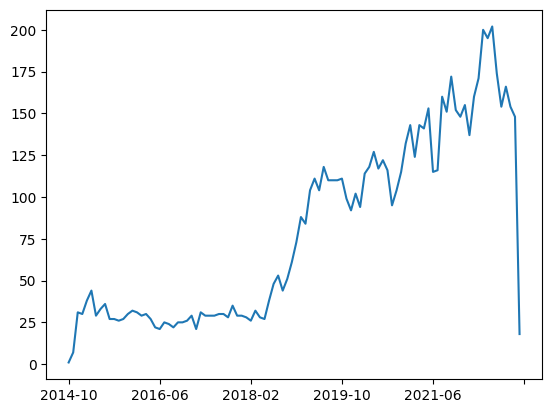

In [17]:
page_si.timestamp.apply(lambda x: x[:7]).value_counts().sort_index().plot()

2018-06 즈음부터 집들이 페이지 수 급증

In [23]:
print(page_si['residence'].value_counts() )
print(page_si['residence'].value_counts() / page_si.shape[0] * 100)

아파트        4743
원룸&오피스텔    1189
빌라&연립       872
단독주택        809
기타          275
사무공간         23
상업공간         21
Name: residence, dtype: int64
아파트        59.795764
원룸&오피스텔    14.989914
빌라&연립      10.993444
단독주택       10.199193
기타          3.466969
사무공간        0.289965
상업공간        0.264750
Name: residence, dtype: float64


<AxesSubplot: >

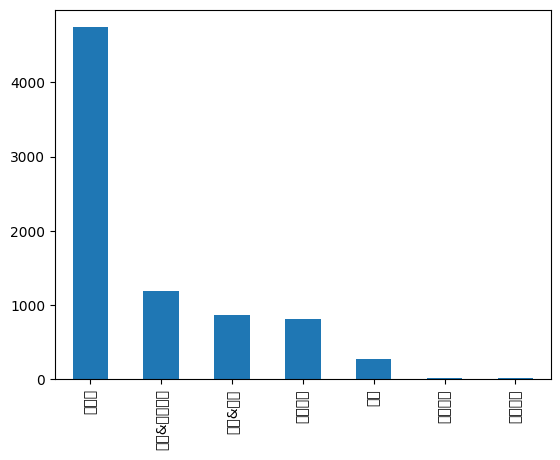

In [26]:
page_si['residence'].value_counts().plot(kind='bar')

`residence` - 위 순서로 많은 페이지 분포됨

In [55]:
page_si['area'].dropna().apply(lambda x: int(re.sub(r'[^\d]', '', x))).describe()

count    7926.000000
mean       27.072798
std        16.884245
min         0.000000
25%        17.000000
50%        25.000000
75%        34.000000
max       300.000000
Name: area, dtype: float64

<AxesSubplot: >

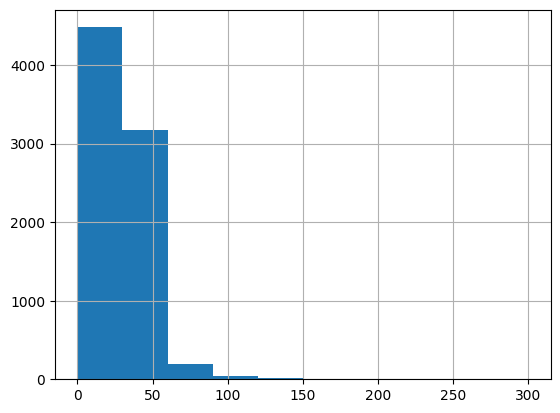

In [54]:
page_si['area'].dropna().apply(lambda x: int(re.sub(r'[^\d]', '', x))).hist(bins=10)

In [61]:
(page_si['area'].dropna().apply(lambda x: int(re.sub(r'[^\d]', '', x))) <= 50).sum() / page_si.shape[0]

0.9436459909228442

50평 이하가 약 94% 이고 그 이상은 적음

In [64]:
print(page_si['agent'].value_counts())
print(page_si['agent'].value_counts()/page_si.shape[0]*100)

셀프•DIY    4280
전문가       2334
반셀프       1318
Name: agent, dtype: int64
셀프•DIY    53.958649
전문가       29.425113
반셀프       16.616238
Name: agent, dtype: float64


셀프가 53%, 전문가 30%, 반셀프 17% 정도

In [65]:
print(page_si['expertise'].value_counts())
print(page_si['expertise'].value_counts()/page_si.shape[0]*100)

홈스타일링    4372
리모델링     2588
부분공사      639
건축        319
청소         14
Name: expertise, dtype: int64
홈스타일링    55.118507
리모델링     32.627332
부분공사      8.055976
건축        4.021684
청소        0.176500
Name: expertise, dtype: float64


홈스타일링 55%, 리모델링 33%로 대부분을 차지

In [66]:
print(page_si['family_list'].value_counts())
print(page_si['family_list'].value_counts()/page_si.shape[0]*100)

['신혼부부']                                       3145
['싱글라이프']                                      1701
['아기가 있는 집']                                   1219
['취학 자녀가 있는 집']                                 746
['부모님과 함께 사는 집']                                478
['기타']                                          318
[]                                              114
['신혼부부', '아기가 있는 집']                             61
['신혼부부', '기타']                                   42
['아기가 있는 집', '취학 자녀가 있는 집']                      36
['싱글라이프', '기타']                                  29
['취학 자녀가 있는 집', '부모님과 함께 사는 집']                   6
['아기가 있는 집', '기타']                                5
['싱글라이프', '부모님과 함께 사는 집']                         5
['부모님과 함께 사는 집', '기타']                            5
['신혼부부', '아기가 있는 집', '기타']                        5
['취학 자녀가 있는 집', '기타']                             5
['아기가 있는 집', '취학 자녀가 있는 집', '기타']                 3
['신혼부부', '부모님과 함께 사는 집']                          2
['아기가 있는 집',

신혼부부, 싱글라이프, 아기가 있는 집 - 이 세 카테고리가 각각 40%, 21%, 15%로 대부분을 차지

In [95]:
page_si[page_si['style_list'] == '[]']

,page_id,title,timestamp,residence,area,agent,expertise,family_list,style_list,budget
172,132293,빈티지 무드 아이템으로 아늑함을 담은 구축 아파트,2022-11-29T11:41:13.000+09:00,아파트,34평,셀프•DIY,홈스타일링,['신혼부부'],[],0
190,130590,"인테리어에 진심인, 아이와 반려견이 함께 타워 팰리스",2022-11-26T08:05:33.000+09:00,아파트,43평,반셀프,홈스타일링,['아기가 있는 집'],[],6000
297,129227,퇴근 후에는 집이 좋습니다. 15평 아늑한 집,2022-11-04T09:54:08.000+09:00,아파트,15평,셀프•DIY,홈스타일링,['싱글라이프'],[],0
307,128390,"거실을 다이닝룸으로, 함께 모일 수 있는 신혼부부의 집",2022-11-02T12:30:45.000+09:00,아파트,25평,전문가,리모델링,['신혼부부'],[],5000
336,127535,제주에서 강아지들과 함께하는 초보 주택러🏡,2022-10-29T08:05:23.000+09:00,단독주택,30평,셀프•DIY,홈스타일링,['신혼부부'],[],0
...,...,...,...,...,...,...,...,...,...,...
7776,893,집 꾸미기 인테리어,2015-04-04T22:47:08.000+09:00,원룸&오피스텔,10평대,셀프•DIY,홈스타일링,[],[],0
7777,892,소박한 자취방 인테리어*^^*,2015-04-04T14:48:05.000+09:00,원룸&오피스텔,10평 미만,셀프•DIY,홈스타일링,[],[],0
7812,794,화이트 페인팅,2015-03-10T17:37:25.000+09:00,빌라&연립,30평대,셀프•DIY,홈스타일링,[],[],0
7835,744,원목욕실 셀프인테리어,2015-02-22T22:23:14.000+09:00,빌라&연립,20평대,셀프•DIY,부분공사,[],[],60


In [94]:
# sum(page_si['style_list'].apply(lambda x: re.sub(r"\'", '', x[1:-1]).split(', ')).tolist(), [])
pd.Series(sum(page_si['style_list'].apply(lambda x: re.sub(r"\'", '', x[1:-1]).split(', ')).tolist(), [])).value_counts() / pd.Series(sum(page_si['style_list'].apply(lambda x: re.sub(r"\'", '', x[1:-1]).split(', ')).tolist(), [])).value_counts().sum()

내추럴         0.338899
모던          0.203061
미니멀&심플      0.122532
빈티지&레트로     0.078529
            0.074702
북유럽         0.068354
유니크&믹스매치    0.040438
러블리&로맨틱     0.026089
클래식&앤틱      0.022872
프렌치&프로방스    0.010523
한국&아시아      0.010001
인더스트리얼      0.004000
dtype: float64

style의 경우 여러개 선택한 페이지가 많아 집계가 쉽지 않음

다 떼서 보면 내추럴, 모던, 미니멀&심플 이 34%, 20%, 12%로 주로 존재

참고) [] 인 데이터 존재 -> 해당 카테고리 입력하지 않은 케이스

In [100]:
page_si['budget'][page_si['budget']!=0].describe()

count    3.662000e+03
mean     5.379455e+03
std      1.733795e+05
min      4.000000e+00
25%      2.000000e+02
50%      1.000000e+03
75%      3.500000e+03
max      1.049050e+07
Name: budget, dtype: float64

In [103]:
page_si[page_si['budget']!=0].sort_values('budget').head(10)

,page_id,title,timestamp,residence,area,agent,expertise,family_list,style_list,budget
5769,12445,간단한 셀프페인팅으로 우리의 색을 불어넣은 신혼집.,2019-06-24T10:05:19.000+09:00,아파트,25평,셀프•DIY,홈스타일링,['신혼부부'],"['모던', '미니멀&심플', '내추럴']",4
4313,33889,"우리가 꿈꾸던 모던 프렌치, 사랑스러운 전원생활",2020-08-01T08:05:13.000+09:00,단독주택,51평,반셀프,건축,['신혼부부'],['프렌치&프로방스'],5
7326,2319,썸머룸 프로젝트_안방편,2016-08-04T22:58:15.000+09:00,아파트,30평대,셀프•DIY,부분공사,['아기가 있는 집'],['유니크&믹스매치'],5
7588,1422,아이디어를 담은 소품으로 꾸민 공간,2015-10-18T18:19:40.000+09:00,빌라&연립,10평대,셀프•DIY,리모델링,['신혼부부'],['내추럴'],6
7382,2060,알파벳 셀프 페인팅으로 아들방 재탄생,2016-05-20T20:23:16.000+09:00,아파트,30평대,셀프•DIY,부분공사,['취학 자녀가 있는 집'],['유니크&믹스매치'],7
7697,1100,DIY 원목가구 빈티지 좌식형,2015-06-18T16:26:29.000+09:00,단독주택,9평,셀프•DIY,홈스타일링,['싱글라이프'],['내추럴'],8
5620,13791,"또 다른 나의 얼굴, 나의 원룸",2019-08-03T10:05:18.000+09:00,원룸&오피스텔,8평,셀프•DIY,홈스타일링,['싱글라이프'],"['모던', '미니멀&심플', '내추럴']",10
7680,1132,생각의 전환,2015-07-03T10:48:34.000+09:00,아파트,20평대,셀프•DIY,부분공사,['신혼부부'],['내추럴'],10
7354,2206,재활용리폼으로 완성한 정원집들이,2016-06-29T12:27:42.000+09:00,단독주택,50평 이상,셀프•DIY,홈스타일링,[],['유니크&믹스매치'],10
7353,2219,딸을 위한 캠핑컨셉 핫핑크 공간,2016-07-01T18:20:37.000+09:00,아파트,30평대,셀프•DIY,리모델링,['아기가 있는 집'],['북유럽'],10


budget이 4~10으로 적은 페이지 확인 결과, 페이지에 기재된 예산과 상이...

큰 금액은 얼추 맞는 것 같은데, 너무 적은 페이지의 경우 신뢰하기 어려워 해당 컬럼 활용 시 유의할 필요 있음

## `page_product`

In [104]:
page_product

,page_id,item_id
0,133556,32125
1,133556,33050
2,133556,75758
3,133556,101921
4,133556,110328
...,...,...
345266,318,2258
345267,318,2259
345268,318,2261
345269,318,2262


In [105]:
page_product.nunique()

page_id      7861
item_id    131408
dtype: int64

item_id를 추출한 page_id는 총 7861개, 그에 따른 unique item_id 수는 131408개

row 수가 345271인 것에 비해 유니크한 item_id 수가 현저히 적어 여러 페이지에 중복으로 포함된 상품들 다수 존재하는 듯

In [111]:
page_product['item_id'].value_counts()[page_product['item_id'].value_counts() > 1]

204619     743
438844     516
204623     475
354736     443
403500     370
          ... 
948166       2
973814       2
1332378      2
87899        2
842159       2
Name: item_id, Length: 47813, dtype: int64

47813개 item이 중복으로 포함되어, 최대 743개 페이지에 중복으로 포함된 아이템 존재

item_id에 page_id의 카테고리 정보를 merge 할 때, 이러한 여러 페이지에 중복으로 포함된 아이템의 경우 어떻게 처리할지...?

## `review_1234`

In [115]:
review_1234.shape

(14429798, 10)

총 14429798개의 interaction 존재 -> 너무 많음 ㅠ

In [112]:
review_1234[['user_id', 'item_id']].nunique()

user_id    2023942
item_id      80724
dtype: int64

총 유저는 2023942명, 상품은 80724개

In [124]:
review_1234.isna().sum()

item_id                 0
user_id                 0
time                    0
star_avg                0
star_durability         0
star_design             0
star_cost               0
star_delivery           0
review                 40
option             244549
dtype: int64

review 40개 결측, option은 244549개 결측

In [123]:
review_1234['time'].apply(lambda x: x[:7]).value_counts().sort_index()

2016.06         1
2016.07        12
2016.08        56
2016.09        40
2016.10        58
            ...  
2022.09    343608
2022.10    339255
2022.11    354366
2022.12    360244
2023.01     59876
Name: time, Length: 80, dtype: int64

<AxesSubplot: >

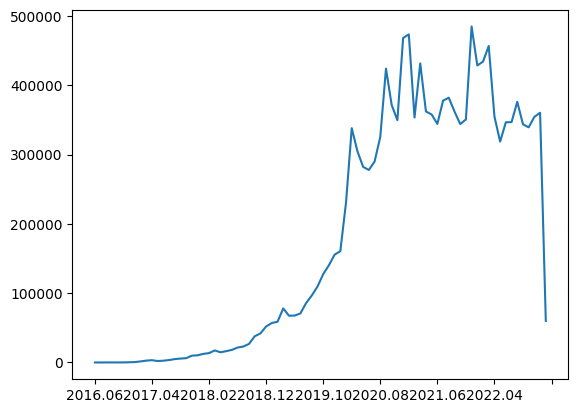

In [122]:
review_1234['time'].apply(lambda x: x[:7]).value_counts().sort_index().plot()

2020.03 즈음부터 리뷰 수 급증

In [127]:
review_1234['star_avg'].describe()

count    1.442980e+07
mean     4.635788e+00
std      5.922164e-01
min      0.000000e+00
25%      4.500000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: star_avg, dtype: float64

<AxesSubplot: >

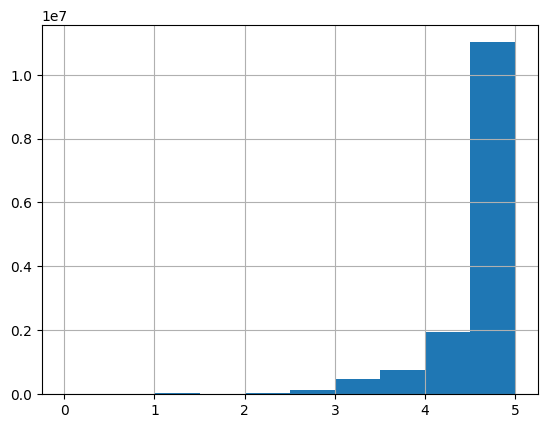

In [126]:
review_1234['star_avg'].hist()

star_avg의 평균이 4.6, 1사분위수가 4.5로, 유저가 주로 높은 별점을 주는 듯

In [129]:
import numpy as np

In [136]:
all(review_1234[['star_durability', 'star_design', 'star_cost', 'star_delivery']].iloc[0,:]== np.array([0,0,0,0]))

True

In [153]:
drop_0 = ~((review_1234['star_durability']==0) & (review_1234['star_design']==0) & (review_1234['star_cost']==0) & (review_1234['star_delivery']==0) & (review_1234['star_avg']!=0))
# review_1234[['star_durability', 'star_design', 'star_cost', 'star_delivery']][(review_1234['star_durability']==0) ]

<AxesSubplot: >

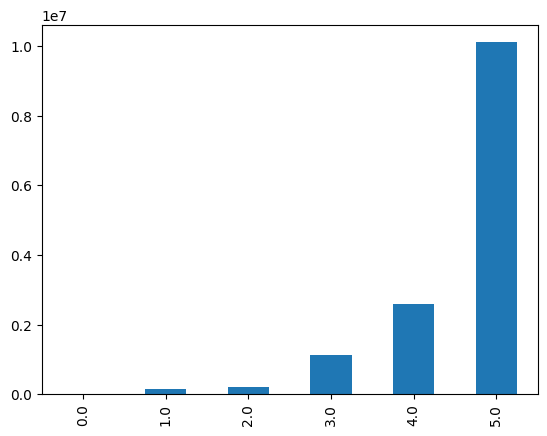

In [158]:
review_1234[drop_0]['star_durability'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot: >

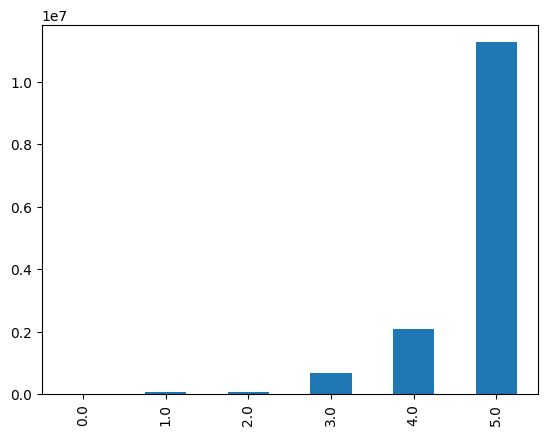

In [159]:
review_1234[drop_0]['star_design'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot: >

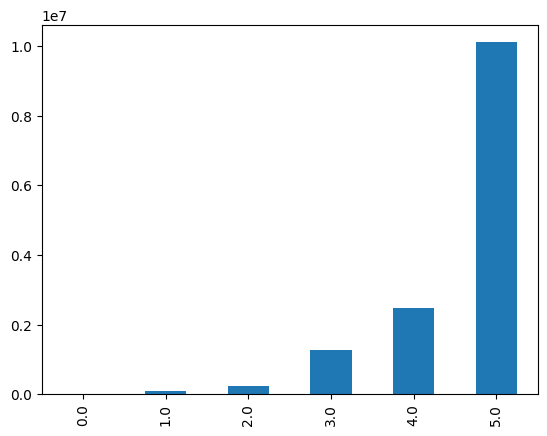

In [160]:
review_1234[drop_0]['star_cost'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot: >

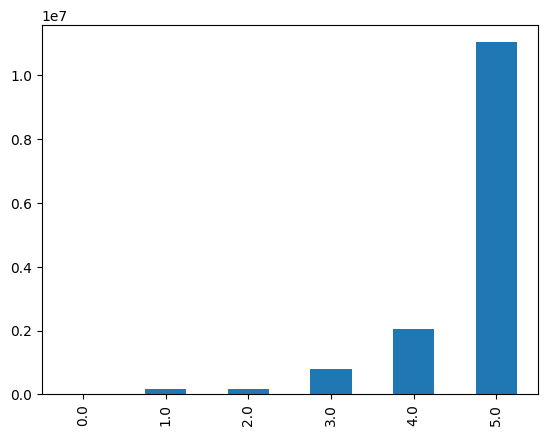

In [161]:
review_1234[drop_0]['star_delivery'].value_counts().sort_index().plot(kind='bar')

별점 종류 별로 비슷하게 4~5점이 많음

## `product_si`

In [163]:
product_si.shape

(128845, 22)

In [175]:
product_si.isna().sum()

item_id                        0
title                          0
brand                          0
original_price                 0
selling_price                  0
wish_count                     0
share_count                    0
scrap_count                    0
qa_count                       0
review_count                   0
review_avg                     0
is_sold_out                    0
is_selling                     0
is_buyable                     0
category0                      0
category1                      0
delivery_fee                   0
delivery_fee_free_threshold    0
img_main                       0
img_sub_list                   0
option_names                   0
max_option_price               0
dtype: int64

In [162]:
product_si[['item_id']].nunique()

item_id    128845
dtype: int64

총 128845개의 상품 존재 (전체 131408개)

In [173]:
product_si['category0'].value_counts() / product_si.shape[0]

가구       0.2111
데코·식물    0.1998
주방용품     0.1559
패브릭      0.1137
가전·디지털   0.0761
조명       0.0564
수납·정리    0.0439
생활용품     0.0376
공구·DIY   0.0334
유아·아동    0.0247
캠핑·레저    0.0160
생필품      0.0117
반려동물     0.0108
인테리어시공   0.0057
렌탈       0.0020
식품       0.0012
Name: category0, dtype: float64

`category0` - 가구, 데코/식물, 주방용품, 패브릭 이 많은 비율 차지

추천 목적에 따라 제외할 카테고리 정할 필요 있음

In [183]:
for c in product_si['category0'].unique():
    print(f"category0 : {c} ({(product_si['category0']==c).sum()}개)")
    print(product_si[product_si['category0']==c][['category1']].value_counts()/ product_si[product_si['category0']==c].shape[0])
    print()

category0 : 가구 (27201개)
category1
의자          0.2038
테이블·식탁·책상   0.2008
서랍·수납장      0.1177
소파          0.1036
거울          0.0731
침대          0.0702
선반          0.0634
진열장·책장      0.0500
행거·옷장       0.0451
거실장·TV장     0.0297
화장대·콘솔      0.0200
매트리스·토퍼     0.0183
가벽·파티션      0.0043
dtype: float64

category0 : 주방용품 (20081개)
category1
컵·잔·텀블러     0.2492
그릇·홈세트      0.2269
주방잡화        0.1171
주방수납·정리     0.0798
조리도구·도마     0.0741
수저·커트러리     0.0654
보관·용기·도시락   0.0558
냄비·프라이팬·솥   0.0454
커피·티용품      0.0353
식기건조대       0.0217
칼·커팅기구      0.0195
와인·칵테일용품    0.0069
베이킹용품       0.0017
공간별주방용품     0.0011
dtype: float64

category0 : 수납·정리 (5662개)
category1
리빙박스·바구니    0.3204
화장대·테이블정리   0.3172
후크·수납걸이     0.1183
서랍장·트롤리     0.0828
옷걸이         0.0581
빨래바구니·햄퍼    0.0466
현관·신발정리     0.0385
옷정리·이불정리    0.0180
dtype: float64

category0 : 생활용품 (4845개)
category1
욕실용품        0.5837
청소용품        0.1864
생활잡화        0.1273
수건·타월       0.0638
세탁용품        0.0388
dtype: float64

category0 : 패브릭 (14651개)
category1


In [164]:
product_si.columns

Index(['item_id', 'title', 'brand', 'original_price', 'selling_price',
       'wish_count', 'share_count', 'scrap_count', 'qa_count', 'review_count',
       'review_avg', 'is_sold_out', 'is_selling', 'is_buyable', 'category0',
       'category1', 'delivery_fee', 'delivery_fee_free_threshold', 'img_main',
       'img_sub_list', 'option_names', 'max_option_price'],
      dtype='object')

In [15]:
product_si

,item_id,title,brand,original_price,selling_price,wish_count,share_count,scrap_count,qa_count,review_count,...,is_selling,is_buyable,category0,category1,delivery_fee,delivery_fee_free_threshold,img_main,img_sub_list,option_names,max_option_price
0,265527,마르틴 원목 사이드보드 2colors,장미맨숀,938000,469000,9380,517,9380,245,198,...,True,True,가구,거실장·TV장,30000,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['색상:클래식화이트', '색상:램프블랙']",469000
1,456986,600ml 스텐 우유 스팀피쳐/눈금형,벨라쿠진,19800,9900,1118,31,1118,10,153,...,True,True,주방용품,커피·티용품,3000,10000,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,['선택:600ml 스텐 우유 스팀피쳐/눈금형'],9900
2,118895,PETALO CHAIR,잭슨카멜레온,0,0,3375,108,3375,0,4,...,False,True,가구,의자,0,0,https://image.ohou.se/image/central_crop/bucke...,[],[],0
3,312929,스틸 접이식 실내화걸이 3단,네이쳐리빙,13000,8900,5458,308,5458,114,4968,...,True,True,수납·정리,현관·신발정리,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['색상:화이트', '색상:블랙']",8900
4,232064,"샤워볼 20g, 40g, 60g",소소모소,4500,1800,638,10,638,8,206,...,True,True,생활용품,욕실용품,3000,50000,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['중량:미니샤워볼 20g', '중량:베이직샤워볼 40g', '중량:빅샤워볼 60g']",2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128840,2257,오스포드 커트지 라인팬더,천가게,0,4800,23,5,23,0,0,...,False,True,패브릭,홈패브릭,0,0,https://image.ohou.se/image/central_crop/bucke...,[],[],4800
128841,2258,고밀도해지 꽃핑크 34254,원단천국,0,4500,47,3,47,0,0,...,False,True,패브릭,홈패브릭,0,0,https://image.ohou.se/image/central_crop/bucke...,[],[],4500
128842,2263,[단종]CHAIR 01-1,라곰,0,160000,44,1,44,0,0,...,False,True,가구,의자,0,0,https://image.ohou.se/image/central_crop/bucke...,[],[],160000
128843,2262,알파벳 우드 이니셜 내츄럴,진바스,0,10000,29,4,29,0,0,...,False,True,데코·식물,인테리어소품,0,0,https://image.ohou.se/image/central_crop/bucke...,[],[],10000


product_si - is_ 컬럼 분석

In [16]:
product_si['is_buyable'].value_counts()

True     128781
False        64
Name: is_buyable, dtype: int64

In [17]:
product_si['is_selling'].value_counts()

True     71711
False    57134
Name: is_selling, dtype: int64

In [18]:
product_si['is_sold_out'].value_counts()

False    111899
True      16946
Name: is_sold_out, dtype: int64

In [19]:
product_si[['is_buyable', 'is_selling', 'is_sold_out']].value_counts()
# TFF -> 미입점
# TTF -> 정상
# TTT -> 품절
# FFF -> 단종
# 정상, 품절만 사용(?)

is_buyable  is_selling  is_sold_out
True        False       False          57070
            True        False          54765
                        True           16946
False       False       False             64
dtype: int64

TFF -> 미입점

TTF -> 정상

TTT -> 품절

FFF -> 단종

정상, 품절 or 정상만 사용(?)

In [20]:
product_si[(~product_si['is_buyable']) & (~product_si['is_selling']) & (~product_si['is_sold_out'])]

,item_id,title,brand,original_price,selling_price,wish_count,share_count,scrap_count,qa_count,review_count,...,is_selling,is_buyable,category0,category1,delivery_fee,delivery_fee_free_threshold,img_main,img_sub_list,option_names,max_option_price
82241,245563,살면서 시공하는 두현폴딩 무마감 커튼월 폴딩도어 / 아파트 30평후반~50평 이상,두현창호,2400000,2400000,98,15,98,0,0,...,False,False,인테리어시공,창호·폴딩도어,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['사이즈:30평후반~40평대 3600~4200 (6짝)', '사이즈:30평후반~4...",3200000
82756,159312,폴딩도어 (도어6개 기준),한샘,2736000,2736000,564,76,564,1,0,...,False,False,인테리어시공,창호·폴딩도어,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,['선택:[한샘도어] 폴딩도어'],2736000
82757,158853,[단독혜택][주방시공]2400G 마노 웜그레이,리바트,2557100,1790000,188,42,188,1,2,...,False,False,인테리어시공,주방,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['구성옵션:기본형/ㅡ자/1.5m/상하부', '구성옵션:기본형/ㅡ자/1.8m/상하부...",3760000
82943,159546,[주방시공상담] 유로8000 화이트,한샘,2896570,2896570,165,10,165,0,0,...,False,False,인테리어시공,주방,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['선택:ㅡ자형 / 2.4m', '선택:ㅡ자형 / 3m', '선택:ㅡ자형 / 3...",5831790
83846,159563,[주방시공상담] 키친바흐7 602 스모크드오크 [=자형 6.3m 기준],한샘,38545000,38545000,83,11,83,0,0,...,False,False,인테리어시공,주방,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['선택:베이직 플랜 [=자형 6.3m 기준]', '선택:대표 플랜 [=자형 7.8...",55709000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113677,159329,한샘 원목마루 바흐700,한샘,281800,281800,146,20,146,0,0,...,False,False,인테리어시공,벽지·장판·마루,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,['선택:[한샘마루] 한샘 원목마루 바흐700'],281800
113844,159305,터닝도어,한샘,934560,934560,284,32,284,0,2,...,False,False,인테리어시공,중문·도어,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,['선택:터닝도어 * 950 X 22/00 사이즈 (22T 아쿠아+투명유리 기준)'],934560
116608,159332,한샘 강마루,한샘,153000,153000,847,81,847,1,0,...,False,False,인테리어시공,벽지·장판·마루,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,['선택:한샘 강마루 (1평 기준)'],153000
118168,158825,[단독혜택][주방시공] 2500G 릴리,리바트,2365700,1656000,748,133,748,10,12,...,False,False,인테리어시공,주방,0,0,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['사이즈:01. ㅡ자1.5m (기본형)', '사이즈:02. ㅡ자1.8m (기본형)...",3485000


# review 데이터 어떻게 전처리 해야할까?
- 판매 중인 데이터만?
- user_id, item_id 중복 데이터 제거
- 카테고리 선택 후 나머지 제거
- 오래된 리뷰 제거?
- 리뷰를 적게 남긴 유저 제거?
- 리뷰가 적은 아이템 제거?

## 판매중 / 판매중 or 품절 아이템으로 병합해 보기

In [5]:
product_si[(product_si['is_buyable']) & (product_si['is_selling'])].shape # 71711 rows × 22 columns

(71711, 22)

판매중 or 품절 아이템 수는 71711개

In [6]:
product_si[(product_si['is_buyable']) & (product_si['is_selling']) & (~product_si['is_sold_out'])].shape # 54765 rows × 22 columns

(54765, 22)

판매중인 아이템은 54765개

In [7]:
review_norm_soldout = review_1234.merge(product_si[(product_si['is_buyable']) & (product_si['is_selling'])], how='inner', on='item_id')

In [8]:
review_norm = review_1234.merge(product_si[(product_si['is_buyable']) & (product_si['is_selling']) & (~product_si['is_sold_out'])], how='inner', on='item_id')


In [9]:
print(review_1234.shape)
print(review_1234[['user_id', 'item_id']].nunique())

(14429798, 10)
user_id    2023942
item_id      80724
dtype: int64


In [45]:
print(review_norm_soldout.shape)
print(review_norm_soldout[['user_id', 'item_id']].nunique())
print((1 - review_norm_soldout.shape[0] / (review_norm_soldout['user_id'].nunique() * review_norm_soldout['item_id'].nunique()))*100)

(13514644, 31)
user_id    1987364
item_id      62034
dtype: int64
99.98903780796296


판매중 or 품절 아이템 병합 결과 sparsity = 99.989% 

In [11]:
print(review_norm.shape)
print(review_norm[['user_id', 'item_id']].nunique())
print((1 - review_norm.shape[0] / (review_norm['user_id'].nunique() * review_norm['item_id'].nunique()))*100)

(12501506, 31)
user_id    1929625
item_id      47854
dtype: int64
99.98646148061195


판매중인 아이템만 병합 결과 sparsity = 99.986% 

## user_id, item_id 중복 데이터 제거

In [17]:
review_norm.sort_values('time', inplace=True)

In [20]:
review_norm_dups = review_norm[review_norm.duplicated(subset=['item_id', 'user_id'], keep=False)].sort_values('user_id')

In [24]:
review_norm_dups[(review_norm_dups['item_id']==25152) & (review_norm_dups['user_id']==11)]

,item_id,user_id,time,star_avg,star_durability,star_design,star_cost,star_delivery,review,option,...,is_selling,is_buyable,category0,category1,delivery_fee,delivery_fee_free_threshold,img_main,img_sub_list,option_names,max_option_price
12494283,25152,11,2017.10.08,5.0000,5.0000,5.0000,5.0000,5.0000,커튼 사면서 같이구매했는데요. 갯수를잘못시켜서 모자라네요.추가주문했어요.ㅋㅋ 깔끔하...,NaN,...,True,True,패브릭,커튼·부자재,3500,70000,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['선택:15mm화이트(10p)', '선택:25mm화이트(10p)', '선택:25m...",1900
12494282,25152,11,2017.10.08,5.0000,5.0000,5.0000,5.0000,5.0000,화이트커튼하고같이구매했어요. 갯수를 모자라게주문하는바람에 추가구매했다는ㅋㅋ 깔끔하고...,25mm화이트(10p),...,True,True,패브릭,커튼·부자재,3500,70000,https://image.ohou.se/image/central_crop/bucke...,['https://image.ohou.se/image/central_crop/buc...,"['선택:15mm화이트(10p)', '선택:25mm화이트(10p)', '선택:25m...",1900


In [33]:
review_norm_dups.drop_duplicates(subset=['item_id', 'user_id'], keep='last').shape[0]

372887

In [22]:
review_norm_dups.shape[0]

810694

약 81만건의 리뷰가 중복으로 남겨짐

한번에 여러 개를 구매한 경우도 있고, 구매 후 어느 정도 텀을 두고 재구매한 경우도 있음

`is_rebuying` 이라는 이름으로 중복 리뷰인 경우 1, 아닌 경우 0으로 컬럼 생성하고 중복 제거

중복 제거 기준은 가장 최근 리뷰를 남겨놓는 것으로 결정

In [25]:
review_norm_dups.groupby(['user_id', 'item_id'])['time'].cumcount()

12494283    0
12494282    1
4438354     0
4438355     1
10714317    0
           ..
3793384     1
12059656    0
12059677    1
7758731     0
7758732     1
Length: 810694, dtype: int64

In [28]:
review_norm['is_rebuying'] = review_norm.groupby(['user_id', 'item_id'])['time'].cumcount().apply(lambda x: True if x>0 else False)

In [36]:
review_norm.drop_duplicates(subset=['item_id','user_id'], keep='last', inplace=True)

In [37]:
print(review_norm.shape)
print(review_norm[['user_id', 'item_id']].nunique())
print((1 - review_norm.shape[0] / (review_norm['user_id'].nunique() * review_norm['item_id'].nunique()))*100)

(12063699, 32)
user_id    1929625
item_id      47854
dtype: int64
99.98693560417416


## 카테고리 제거

In [38]:
review_norm.groupby(['category0'])['item_id'].nunique().sort_values(ascending=False)

category0
데코·식물     10285
주방용품       9173
가구         8772
패브릭        5120
가전·디지털     2996
수납·정리      2660
조명         2344
생활용품       1853
공구·DIY     1298
유아·아동       956
캠핑·레저       869
생필품         635
반려동물        552
인테리어시공      167
식품           90
렌탈           84
Name: item_id, dtype: int64

In [39]:
review_norm['category0'].unique()

array(['수납·정리', '조명', '데코·식물', '가구', '생활용품', '주방용품', '패브릭', '가전·디지털',
       '생필품', '공구·DIY', '유아·아동', '반려동물', '렌탈', '캠핑·레저', '인테리어시공', '식품'],
      dtype=object)

'주방용품', '생활용품', '공구·DIY', '조명', '패브릭', '가구', '데코·식물', '수납·정리' 카테고리만 사용

In [40]:
review_norm_selected = review_norm[review_norm['category0'].isin(['주방용품', '생활용품', '공구·DIY', '조명', '패브릭', '가구', '데코·식물', '수납·정리'])]

In [41]:
print(review_norm_selected.shape)
print(review_norm_selected[['user_id', 'item_id']].nunique())
print((1 - review_norm_selected.shape[0] / (review_norm_selected['user_id'].nunique() * review_norm_selected['item_id'].nunique()))*100)

(11104478, 32)
user_id    1807096
item_id      41505
dtype: int64
99.98519472409163


## 오래된 리뷰 제거?
- 제거할 필요성을 잘 모르겠음..

In [44]:
review_norm_selected['time'].apply(lambda x: x[:7]).value_counts().sort_index()

2016.06         1
2016.07         3
2016.08        21
2016.09        11
2016.10        26
            ...  
2022.09    282278
2022.10    281619
2022.11    295170
2022.12    302147
2023.01     50895
Name: time, Length: 80, dtype: int64

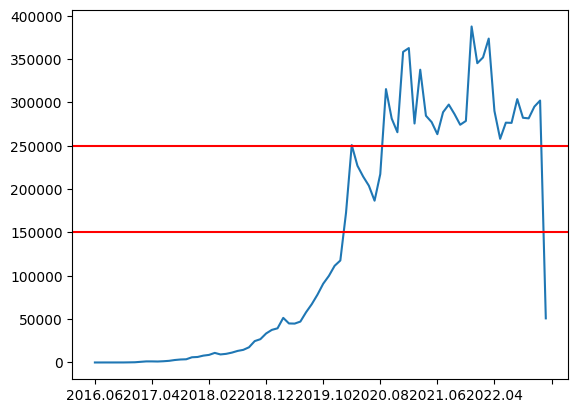

In [48]:
review_norm_selected['time'].apply(lambda x: x[:7]).value_counts().sort_index().plot()
plt.axhline(y=150000, color='red')
plt.axhline(y=250000, color='red')

In [43]:
review_norm_selected['time'].apply(lambda x: x[:7]).value_counts().sort_index()[review_norm_selected['time'].apply(lambda x: x[:7]).value_counts().sort_index()>150000]

2020.02    172807
2020.03    250833
2020.04    226957
2020.05    214485
2020.06    203931
2020.07    186636
2020.08    217360
2020.09    315351
2020.10    281394
2020.11    265606
2020.12    358307
2021.01    362684
2021.02    275674
2021.03    337722
2021.04    284632
2021.05    277274
2021.06    263367
2021.07    288691
2021.08    297508
2021.09    286583
2021.10    274232
2021.11    278627
2021.12    387605
2022.01    345236
2022.02    351886
2022.03    373654
2022.04    290167
2022.05    257995
2022.06    276650
2022.07    276401
2022.08    303809
2022.09    282278
2022.10    281619
2022.11    295170
2022.12    302147
Name: time, dtype: int64

In [ ]:
# review_norm_selected = review_norm_selected[review_norm_selected['time']>=2020.09]

## 리뷰를 적게 남긴 유저 제거?

In [49]:
review_norm_selected.groupby('user_id')['item_id'].count().sort_values()

user_id
19776600       1
11268160       1
11268072       1
11267997       1
4509000        1
            ... 
1595159      308
1468106      313
3971313      331
5007844      471
2692433     2698
Name: item_id, Length: 1807096, dtype: int64

In [50]:
review_norm_selected = review_norm_selected[review_norm_selected['user_id']!=2692433]

16031개의 리뷰를 남긴 유저 존재 (user_id = 2692433) -> 이상치로 판단하여 제거

In [52]:
print(review_norm_selected.groupby('user_id')['item_id'].count().value_counts().sort_index())
print((review_norm_selected.groupby('user_id')['item_id'].count().value_counts().sort_index() / review_norm_selected['user_id'].nunique())[:30])

1      610401
2      264854
3      166984
4      119751
5       91804
        ...  
300         1
308         1
313         1
331         1
471         1
Name: item_id, Length: 223, dtype: int64
1    0.3378
2    0.1466
3    0.0924
4    0.0663
5    0.0508
6    0.0399
7    0.0328
8    0.0271
9    0.0230
10   0.0195
11   0.0169
12   0.0145
13   0.0128
14   0.0113
15   0.0099
16   0.0088
17   0.0078
18   0.0071
19   0.0063
20   0.0057
21   0.0051
22   0.0047
23   0.0042
24   0.0038
25   0.0034
26   0.0032
27   0.0029
28   0.0026
29   0.0024
30   0.0022
Name: item_id, dtype: float64


전체 유저 수 대비 review를 1번 남긴 유저 : 33.3%

전체 유저 수 대비 review를 2번 남긴 유저 : 14.6%

-> 몇 개까지 적은 리뷰를 남긴 유저 제거할까?
    - 서비스 운영시 유저가 선택할 최소 상품 수를 5개로 한다면, 5개보다 적은 리뷰를 남긴 유저에 대해서는 제거하는게 좋을수도..?

In [53]:
review_drop_5 = review_norm_selected[review_norm_selected['user_id'].isin(review_norm_selected.groupby('user_id')['item_id'].count()[review_norm_selected.groupby('user_id')['item_id'].count() >= 5].index)]

In [54]:
print(review_drop_5.shape)
print(review_drop_5[['user_id', 'item_id']].nunique())
print((1 - review_drop_5.shape[0] / (review_drop_5['user_id'].nunique() * review_drop_5['item_id'].nunique()))*100)

(8981715, 32)
user_id    645105
item_id     40548
dtype: int64
99.96566323118114


review를 5개보다 적게 남긴 유저 제거했을 때 sparsity = 99.966%

## 리뷰가 적은 상품 제거?

In [56]:
review_drop_5.groupby('item_id')['user_id'].count().sort_values()

item_id
1767908        1
1332594        1
648087         1
648146         1
648726         1
           ...  
314121     31277
379255     32846
344496     33246
107013     34194
345755     34437
Name: user_id, Length: 40548, dtype: int64

In [55]:
review_drop_5.groupby('item_id')['user_id'].count().value_counts().sort_index()

1        4118
2        2651
3        1875
4        1421
5        1230
         ... 
31277       1
32846       1
33246       1
34194       1
34437       1
Name: user_id, Length: 2352, dtype: int64

In [57]:
print(review_drop_5.groupby('item_id')['user_id'].count().value_counts().sort_index())
print(review_drop_5.groupby('item_id')['user_id'].count().value_counts().sort_index() / review_drop_5['item_id'].nunique())
print((review_drop_5.groupby('item_id')['user_id'].count().value_counts().sort_index() / review_drop_5['item_id'].nunique()).cumsum()[:30])

1        4118
2        2651
3        1875
4        1421
5        1230
         ... 
31277       1
32846       1
33246       1
34194       1
34437       1
Name: user_id, Length: 2352, dtype: int64
1       0.1016
2       0.0654
3       0.0462
4       0.0350
5       0.0303
         ...  
31277   0.0000
32846   0.0000
33246   0.0000
34194   0.0000
34437   0.0000
Name: user_id, Length: 2352, dtype: float64
1    0.1016
2    0.1669
3    0.2132
4    0.2482
5    0.2786
6    0.3051
7    0.3264
8    0.3466
9    0.3636
10   0.3800
11   0.3947
12   0.4081
13   0.4201
14   0.4311
15   0.4425
16   0.4531
17   0.4615
18   0.4704
19   0.4786
20   0.4863
21   0.4940
22   0.5009
23   0.5073
24   0.5142
25   0.5215
26   0.5276
27   0.5338
28   0.5398
29   0.5446
30   0.5497
Name: user_id, dtype: float64


일단 리뷰가 30개 미만인 상품 제거해보자

In [61]:
review_drop_5_30 = review_drop_5[review_drop_5['item_id'].isin(review_drop_5.groupby('item_id')['user_id'].count()[review_drop_5.groupby('item_id')['user_id'].count() >= 30].index)]

In [62]:
print(review_drop_5_30.shape)
print(review_drop_5_30[['user_id', 'item_id']].nunique())
print((1 - review_drop_5_30.shape[0] / (review_drop_5_30['user_id'].nunique() * review_drop_5_30['item_id'].nunique()))*100)

(8800191, 32)
user_id    645103
item_id     18467
dtype: int64
99.92613024009258


In [63]:
review_drop_5_30.groupby('category0')['item_id'].nunique()

category0
가구        3954
공구·DIY     369
데코·식물     3740
생활용품      1131
수납·정리     1570
조명         793
주방용품      4196
패브릭       2714
Name: item_id, dtype: int64

## 저장

In [64]:
review_drop_5_30.columns

Index(['item_id', 'user_id', 'time', 'star_avg', 'star_durability',
       'star_design', 'star_cost', 'star_delivery', 'review', 'option',
       'title', 'brand', 'original_price', 'selling_price', 'wish_count',
       'share_count', 'scrap_count', 'qa_count', 'review_count', 'review_avg',
       'is_sold_out', 'is_selling', 'is_buyable', 'category0', 'category1',
       'delivery_fee', 'delivery_fee_free_threshold', 'img_main',
       'img_sub_list', 'option_names', 'max_option_price', 'is_rebuying'],
      dtype='object')

In [89]:
inter = review_drop_5_30[['item_id', 'user_id', 'time', 'star_avg', 'star_durability',
       'star_design', 'star_cost', 'star_delivery', 'review', 'option']]

In [90]:
item = review_drop_5_30[['item_id', 'title', 'brand', 'original_price', 'selling_price', 'wish_count',
       'share_count', 'scrap_count', 'qa_count', 'review_count', 'review_avg',
       'category0', 'category1',
       'delivery_fee', 'delivery_fee_free_threshold', 'max_option_price', 'is_rebuying']]

In [78]:
inter_col_names = pd.read_csv("../RecBole/dataset/ohou/ohou_full.inter", nrows=1)
item_col_names = pd.read_csv("../RecBole/dataset/ohou/ohou.item", nrows=1)

In [94]:
inter.columns = inter_col_names.columns

In [95]:
item_col_names.columns

Index(['item_id:token', 'title:token_seq', 'brand:token',
       'original_price:float', 'selling_price:float', 'wish_count:float',
       'share_count:float', 'scrap_count:float', 'qa_count:float',
       'review_count:float', 'review_avg:float', 'is_sold_out:float',
       'category0:token', 'category1:token', 'delivery_fee:float',
       'delivery_fee_free_threshold:float', 'max_option_price:float'],
      dtype='object')

In [96]:
item.columns = ['item_id:token', 'title:token_seq', 'brand:token',
       'original_price:float', 'selling_price:float', 'wish_count:float',
       'share_count:float', 'scrap_count:float', 'qa_count:float',
       'review_count:float', 'review_avg:float', 'category0:token', 'category1:token', 'delivery_fee:float',
       'delivery_fee_free_threshold:float', 'max_option_price:float', 'is_rebuying:float']

In [97]:
inter.head(1)

,item_id:token,user_id:token,timestamp:float,star_avg:float,star_durability:float,star_design:float,star_cost:float,star_delivery:float,review:token_seq,option:token_seq
561258,11246,520957,2016.08.21,4.0000,4.0000,4.0000,4.0000,4.0000,"두꺼운편이고, 보들보들한게 촉감이 좋네요\n가성비 좋은거 같아요^^",다크그레이 5+1


In [98]:
item.head(1)

,item_id:token,title:token_seq,brand:token,original_price:float,selling_price:float,wish_count:float,share_count:float,scrap_count:float,qa_count:float,review_count:float,review_avg:float,category0:token,category1:token,delivery_fee:float,delivery_fee_free_threshold:float,max_option_price:float,is_rebuying:float
561258,11246,후기가 증명하는 무형광 호텔수건 30수 150g 10장,까사베르데,36500,27900,64854,7643,64854,886,22090,4.6858,생활용품,수건·타월,3000,9800,27900,False


In [106]:
inter['timestamp:float'][:10].apply(lambda x: time.mktime(datetime.strptime(x, '%Y.%m.%d').timetuple()))

561258     1471737600.0000
12358609   1472169600.0000
12446016   1472515200.0000
11270174   1472515200.0000
1350230    1472601600.0000
6752896    1472860800.0000
569281     1473984000.0000
1354485    1475452800.0000
10524277   1475452800.0000
11237487   1475712000.0000
Name: timestamp:float, dtype: float64

In [117]:
import time
from datetime import datetime
inter['timestamp:float'] = inter['timestamp:float'].apply(lambda x: time.mktime(datetime.strptime(x, '%Y.%m.%d').timetuple()))

In [118]:
inter['timestamp:float']

561258     1471737600.0000
12358609   1472169600.0000
12446016   1472515200.0000
11270174   1472515200.0000
1350230    1472601600.0000
                 ...      
11131885   1673222400.0000
11068220   1673222400.0000
11561084   1673222400.0000
11561083   1673222400.0000
12057771   1673222400.0000
Name: timestamp:float, Length: 8800191, dtype: float64

In [99]:
os.getcwd()

'/opt/ml/input/final-project-level3-recsys-05/data'

In [119]:
inter.to_csv("../RecBole/dataset/ohou-v3/inter-v3.inter", index=False)
item.to_csv("../RecBole/dataset/ohou-v3/item-v3.item", index=False)

## Temporal Global Split 을 위한 timestamp 알아보기

In [110]:
inter['timestamp:float']

561258      2016.08.21
12358609    2016.08.26
12446016    2016.08.30
11270174    2016.08.30
1350230     2016.08.31
               ...    
11131885    2023.01.09
11068220    2023.01.09
11561084    2023.01.09
11561083    2023.01.09
12057771    2023.01.09
Name: timestamp:float, Length: 8800191, dtype: object

In [114]:
inter_time_cumratio = inter.groupby(['timestamp:float'])['item_id:token'].count().sort_index().cumsum() / inter.shape[0]

In [115]:
inter_time_cumratio[(inter_time_cumratio>0.799) & (inter_time_cumratio<0.801)]
# 2022.05.10

timestamp:float
2022.05.09   0.7990
2022.05.10   0.7998
2022.05.11   0.8008
Name: item_id:token, dtype: float64

In [116]:
inter_time_cumratio[(inter_time_cumratio>0.899) & (inter_time_cumratio<0.901)]
# 2022.09.09

timestamp:float
2022.09.08   0.8997
2022.09.09   0.9003
2022.09.10   0.9008
Name: item_id:token, dtype: float64